# ETLYAK DAS Beamforming


In [1]:
import DAS_tools.delay_and_sum as das
import DAS_tools.room_map as room
import matplotlib.pyplot as plt
import soundfile as sf
import sounddevice as sd
import numpy as np
%load_ext autoreload
%autoreload 2

plt.style.use("seaborn-colorblind")
plt.style.use("arh")
import matplotlib.ticker as ticker

formatEng = ticker.EngFormatter(unit="Hz")
formatdB = ticker.EngFormatter(unit="dB")

In [2]:
# sted = "lytterum"
sted = "anechoic"
type = "talk"
# type = "sine"

In [3]:
path = f"audio/{sted}/{type}_seperated/"

In [4]:
N = 5
spacing = 0.2
if sted == "lytterum":
    mic_inputs, fs = das.load_inputs(path + "input", "")
    speaker0 = das.speaker(-1.1, 1.6, 0)
    speaker1 = das.speaker(1, 2, 0)
else:
    mic_inputs_L, fs = das.load_inputs(path + "input", "_L")
    mic_inputs_R, fs = das.load_inputs(path + "input", "_R")
    if N != 5:
        mic_inputs_L = mic_inputs_L[0:5:2]
        mic_inputs_R = mic_inputs_R[0:5:2]
        mic_inputs_superpos = np.sum([mic_inputs_L, mic_inputs_R], axis=0)
    else:
        mic_inputs_superpos = np.sum([mic_inputs_L, mic_inputs_R], axis=0)
    speaker0 = das.speaker(-1.1, 2.95, 0)
    speaker1 = das.speaker(0.95, 2.5, 0)
# mic_inputs_ref, fs = das.load_inputs(path, "_ref")
mic_array = das.microphone_array(spacing, N)
## LYTTERUM
## LYDDØDT
print(mic_inputs_superpos.shape)


(5, 542119)


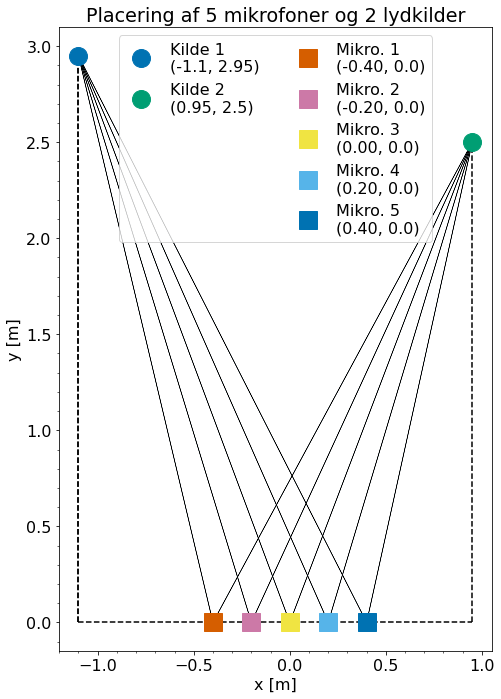

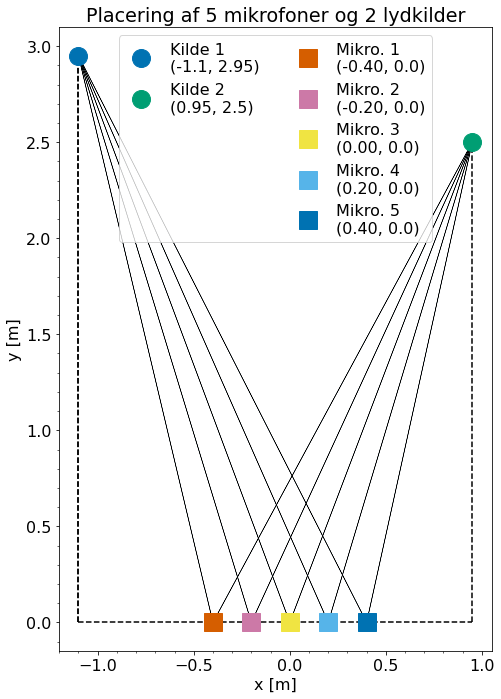

In [5]:
room.view_placements(mic_array,speaker0,speaker1)

The source is placed to the left of the array.
Mic:		[0.8 0.  0. ]
angle: [76.65166037]
extra distance:[0.18469657]m

Mic:		[0.6 0.  0. ]
angle: [76.65166037]
extra distance:[0.13852243]m

Mic:		[0.4 0.  0. ]
angle: [76.65166037]
extra distance:[0.09234828]m

Mic:		[0.2 0.  0. ]
angle: [76.65166037]
extra distance:[0.04617414]m

Mic:		[0. 0. 0.]
angle: [76.65166037]
extra distance:[0.]m

Int delay: [34. 26. 17.  8.  0.]
Fract delay: [0.90553863 0.17915397 0.45276931 0.72638466 0.        ]
The source is placed to the right of the array.
Mic:		[0. 0. 0.]
angle: [61.62861737]
extra distance:[0.]m

Mic:		[0.2 0.  0. ]
angle: [61.62861737]
extra distance:[0.09503696]m

Mic:		[0.4 0.  0. ]
angle: [61.62861737]
extra distance:[0.19007392]m

Mic:		[0.6 0.  0. ]
angle: [61.62861737]
extra distance:[0.28511088]m

Mic:		[0.8 0.  0. ]
angle: [61.62861737]
extra distance:[0.38014784]m

Int delay: [ 0. 10. 20. 30. 40.]
Fract delay: [0.         0.0485423  0.09708459 0.14562689 0.19416918]
The source 

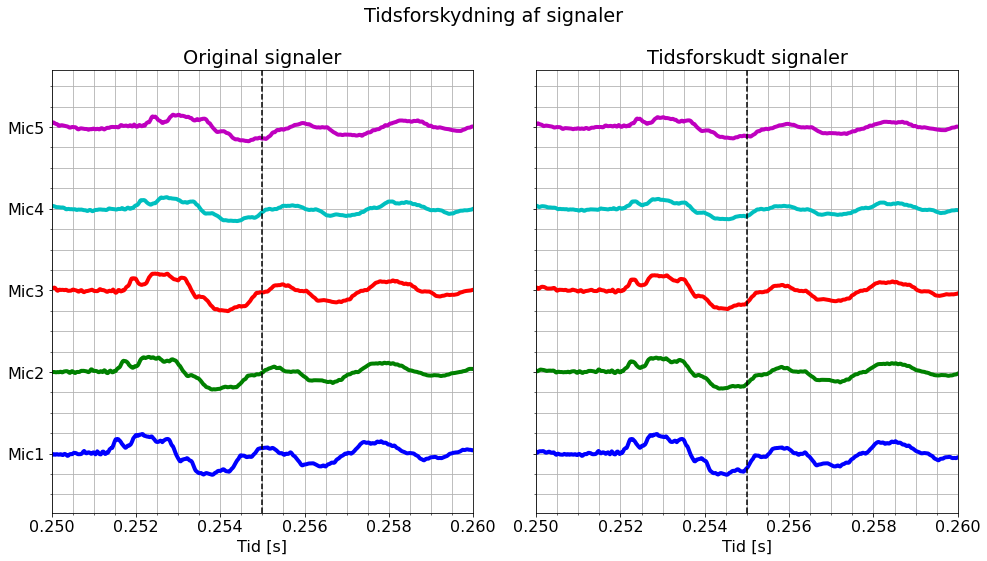

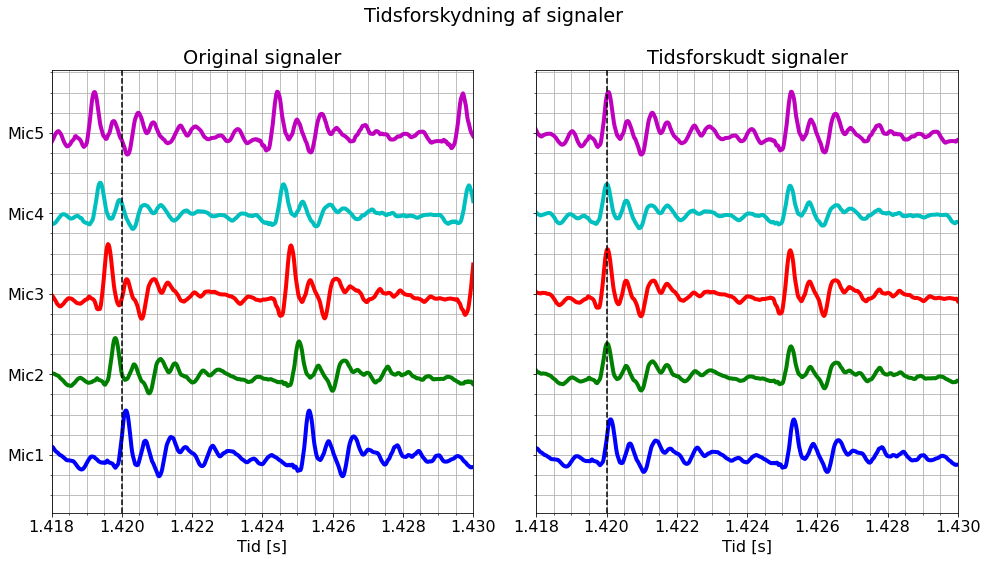

In [6]:
if sted == "lytterum":
    shifted_steer_left = das.shift_viewer(
        mic_inputs, mic_array, speaker0, filename=f"{sted}_{type}_{N}_shift_L"
    )
    shifted_steer_right = das.shift_viewer(
        mic_inputs, mic_array, speaker1, filename=f"{sted}_{type}_{N}shift_R"
    )
else:
    shifted_solo_steer_left = das.shift_viewer(
        mic_inputs_L,
        mic_array,
        speaker0,
        start=0.25,
        stop=0.26,
        axv=0.255,
        filename=f"{N}_{sted}_{type}_DAS_steer_left_solo",
    )
    shifted_solo_steer_right = das.shift_viewer(
        mic_inputs_R,
        mic_array,
        speaker1,
        # start=6.005,
        # stop=6.01,
        axv=1.420,
        filename=f"{N}_{sted}_{type}_DAS_steer_right_solo",
    )
    shifted_steer_left = das.sound_shift(
        mic_inputs_superpos,
        mic_array,
        speaker0,
    )[0]
    shifted_steer_right = das.sound_shift(
        mic_inputs_superpos,
        mic_array,
        speaker1,
    )[0]


In [7]:
cutoff = 400
if sted == "lytterum":
    steer_left = das.sound_sum(shifted_steer_left, cutoff)
    steer_right = das.sound_sum(shifted_steer_right, cutoff)
    non_steer = das.sound_sum(mic_inputs, cutoff)
else:
    solo_steer_left = das.sound_sum(shifted_solo_steer_left, cutoff)
    solo_steer_right = das.sound_sum(shifted_solo_steer_right, cutoff)
    steer_left = das.sound_sum(shifted_steer_left, cutoff)
    steer_right = das.sound_sum(shifted_steer_right, cutoff)
    non_steer = das.sound_sum(mic_inputs_superpos, cutoff)
    solo_non_steer_L = das.sound_sum(mic_inputs_L, cutoff)
    solo_non_steer_R = das.sound_sum(mic_inputs_R, cutoff)


In [8]:
if sted == "lytterum":
    sf.write(f"{path}steer_left.wav", steer_left, fs)
    sf.write(f"{path}steer_right.wav", steer_right, fs)
    sf.write(f"{path}non_steer.wav", non_steer, fs)

else:
    sf.write(f"{path}{N}_solo_steer_left.wav", solo_steer_left, fs)
    sf.write(f"{path}{N}_solo_nonsteer_left.wav", solo_non_steer_L, fs)
    sf.write(f"{path}{N}_solo_steer_right.wav", solo_steer_right, fs)
    sf.write(f"{path}{N}_solo_nonsteer_right.wav", solo_non_steer_R, fs)
    sf.write(f"{path}{N}_steer_left.wav", steer_left, fs)
    sf.write(f"{path}{N}_steer_right.wav", steer_right, fs)
    sf.write(f"{path}{N}_non_steer.wav", non_steer, fs)


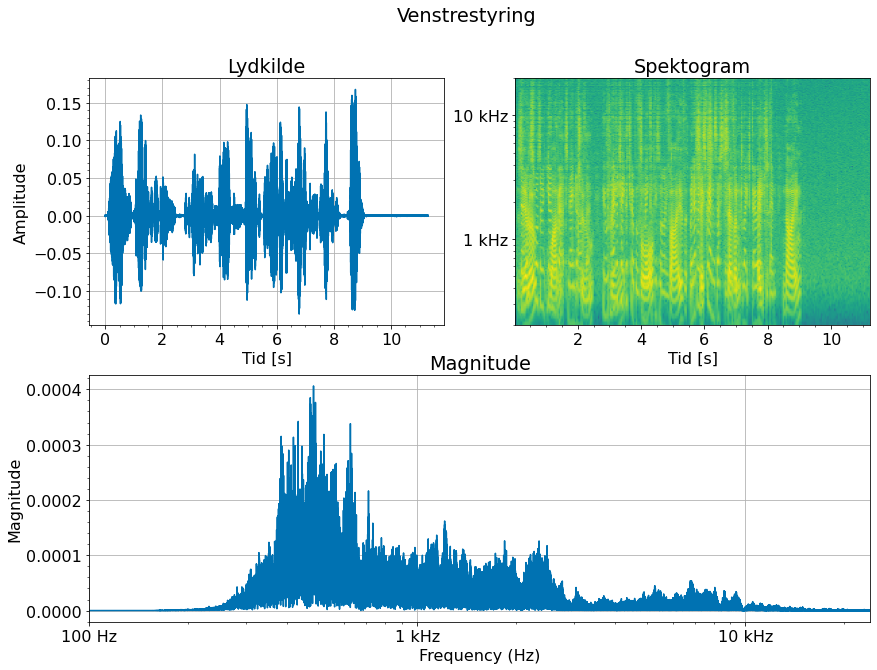

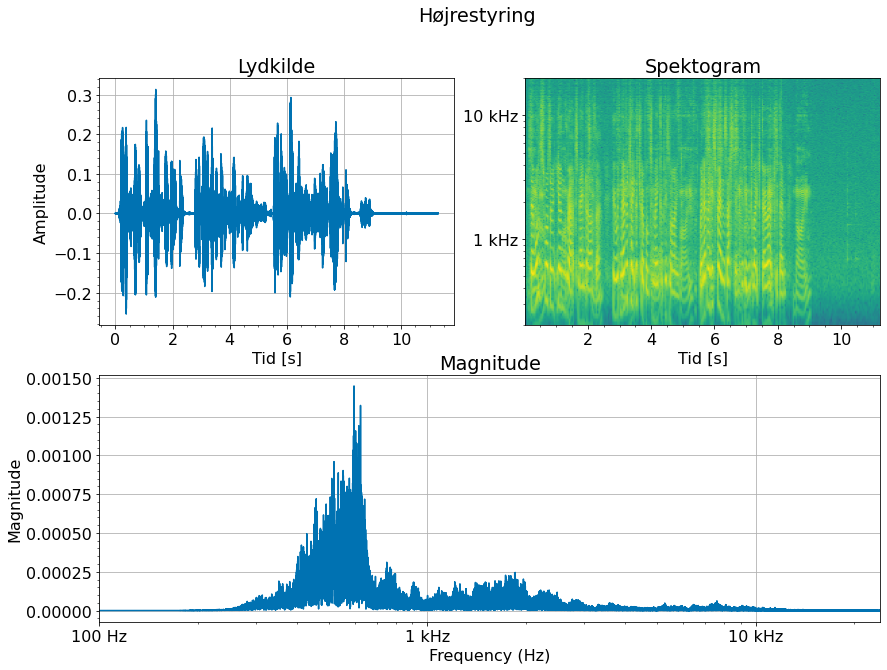

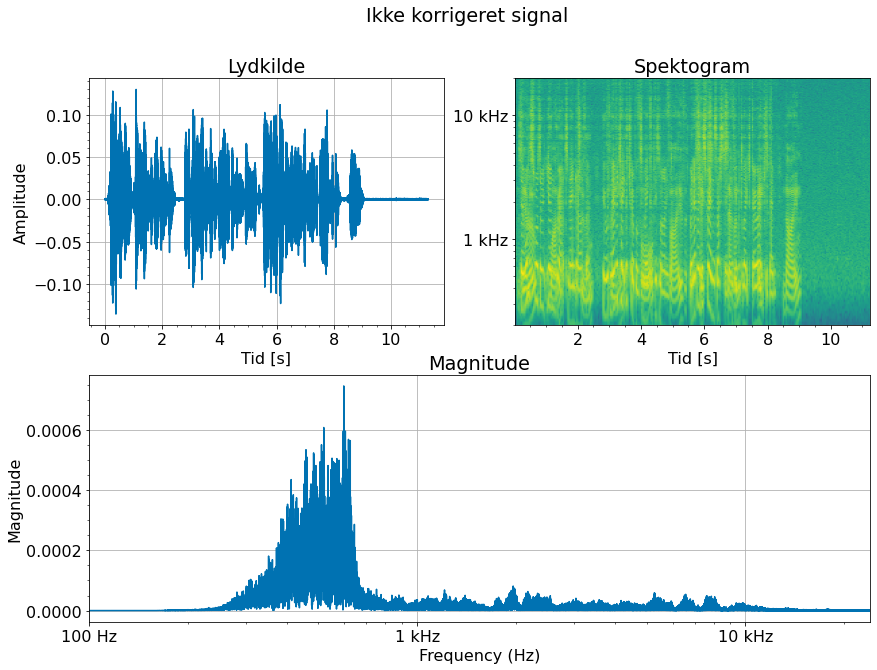

In [9]:
das.source_viewer(steer_left, fs, title="Venstrestyring",filename=f"{N}_{sted}_{type}_steer_left")
das.source_viewer(steer_right, fs, title="Højrestyring",filename=f"{N}_{sted}_{type}_steer_right")
das.source_viewer(non_steer, fs, title="Ikke korrigeret signal",filename=f"{N}_{sted}_{type}_non_steer")


In [10]:
#rms 
def rms(x):
    return np.sqrt(np.mean(x ** 2))


In [11]:
print("left")
print(rms(solo_steer_left))
print(rms(solo_non_steer_L))
print("right")
print(rms(solo_steer_right))
print(rms(solo_non_steer_R))


left
0.012301975348523786
0.0074321807498228375
right
0.030990849975678376
0.016278697664357286


In [12]:
# dB difference between solo and non steer
def dB_diff(x, y):
    return 20 * np.log10(rms(x) / rms(y))


In [13]:
print(dB_diff(solo_steer_left, solo_non_steer_L))
print(dB_diff(solo_steer_right, solo_non_steer_R))

4.37717178627077
5.592276606607314


## FFT  revisited

In [14]:
y = solo_steer_left
y_r = solo_non_steer_L

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


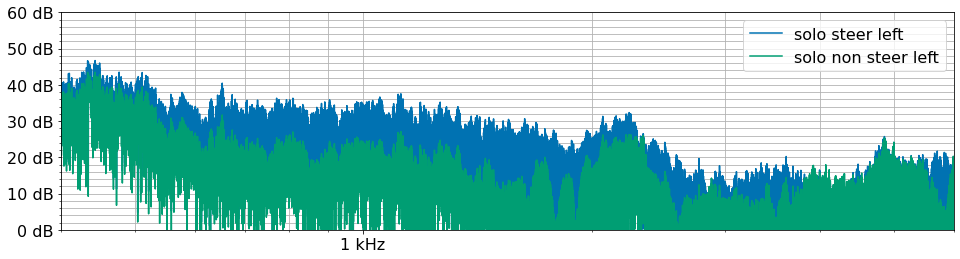

In [29]:
y = solo_steer_left
y_r = solo_non_steer_L
y_fft = np.fft.fft(y) 
y_fft = np.fft.fftshift(y_fft)

y_fft_ref = np.fft.fft(y_r)
y_fft_ref = np.fft.fftshift(y_fft_ref)

fs = 44100
freq = np.fft.fftfreq(len(y), 1 / fs)
freq = np.fft.fftshift(freq)

fig, ax = plt.subplots(figsize=(16,4),facecolor="w")
ax.semilogx(freq, 20*np.log10(np.abs(y_fft)),label="solo steer left")
ax.semilogx(freq, 20*np.log10(np.abs(y_fft_ref)),label="solo non steer left")
ax.set_xlim(400,6e3)
ax.set_ylim(0,60)
ax.legend(loc=1)
ax.grid(which="both")
ax.xaxis.set_major_formatter(formatEng)
ax.yaxis.set_major_formatter(formatdB)
fig.savefig("solo_steer_left_fft.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


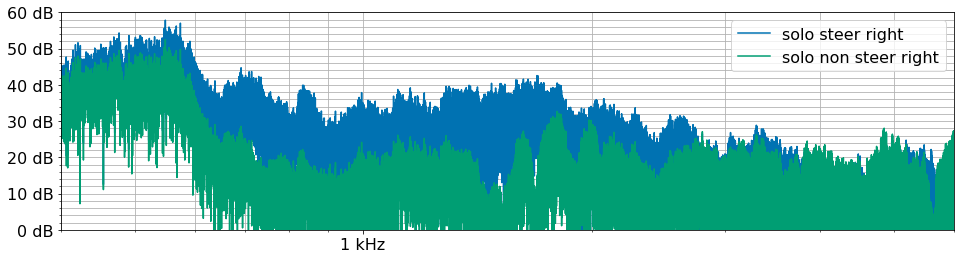

In [30]:
y = solo_steer_right
y_r = solo_non_steer_R
y_fft = np.fft.fft(y) 
y_fft = np.fft.fftshift(y_fft)

y_fft_ref = np.fft.fft(y_r)
y_fft_ref = np.fft.fftshift(y_fft_ref)

fs = 44100
freq = np.fft.fftfreq(len(y), 1 / fs)
freq = np.fft.fftshift(freq)

fig, ax = plt.subplots(figsize=(16,4),facecolor="w")
ax.semilogx(freq, 20*np.log10(np.abs(y_fft)),label="solo steer right")
ax.semilogx(freq, 20*np.log10(np.abs(y_fft_ref)),label="solo non steer right")
ax.set_xlim(400,6e3)
ax.set_ylim(0,60)
ax.legend(loc=1)
ax.grid(which="both")
ax.xaxis.set_major_formatter(formatEng)
ax.yaxis.set_major_formatter(formatdB)
fig.savefig("solo_steer_right_fft.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


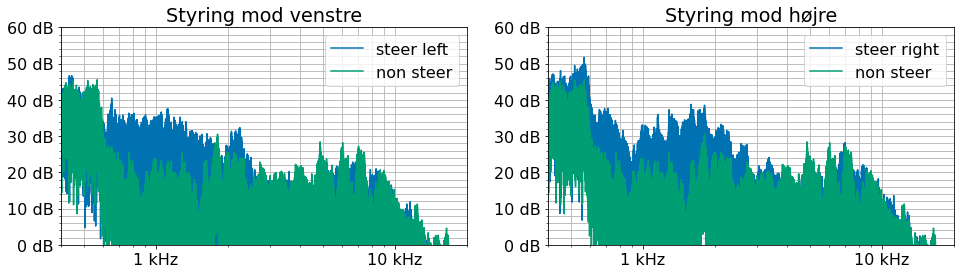

In [28]:
y_l = steer_left * np.blackman(len(steer_left))
y_r = steer_right * np.blackman(len(steer_right))
y_ref = non_steer * np.blackman(len(non_steer))
y_fft = np.fft.fft(y) 
y_fft = np.fft.fftshift(y_fft)
y_r_fft = np.fft.fft(y_r) 
y_r_fft = np.fft.fftshift(y_r_fft)


y_fft_ref = np.fft.fft(y_ref)
y_fft_ref = np.fft.fftshift(y_fft_ref)


fs = 44100
freq = np.fft.fftfreq(len(y), 1 / fs)
freq = np.fft.fftshift(freq)


fig, axs = plt.subplots(1,2,figsize=(16,4),facecolor="w")
axs[0].semilogx(freq, 20*np.log10(np.abs(y_fft)),label="steer left")
axs[0].semilogx(freq, 20*np.log10(np.abs(y_fft_ref)),label="non steer")
axs[1].semilogx(freq, 20*np.log10(np.abs(y_r_fft)),label="steer right")
axs[1].semilogx(freq, 20*np.log10(np.abs(y_fft_ref)),label="non steer")
for ax in axs:
    ax.set_xlim(400,20e3)
    ax.set_ylim(0,60)
    ax.legend(loc=1)
    ax.grid(which="both")
    ax.xaxis.set_major_formatter(formatEng)
    ax.yaxis.set_major_formatter(formatdB)
axs[0].set_title("Styring mod venstre")
axs[1].set_title("Styring mod højre")
fig.savefig("steer_fft.eps")

In [53]:
y = solo_steer_left
y_ref = solo_non_steer_L
t = np.arange(0, len(y)) / fs

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


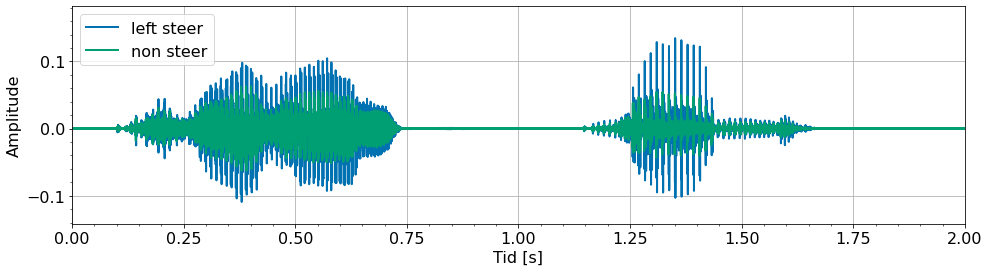

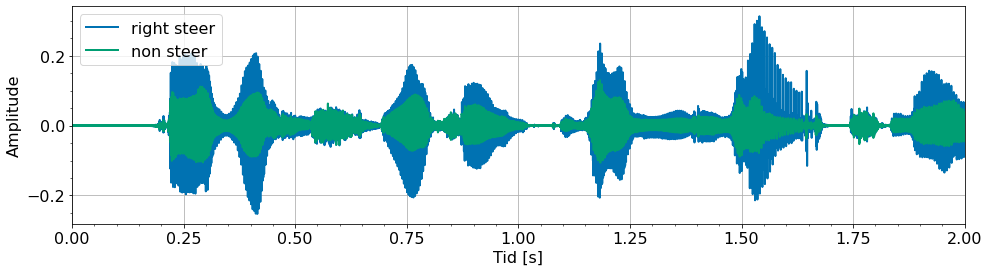

In [62]:
y_l = solo_steer_left
y_r = solo_steer_right
y_l_ref = solo_non_steer_L
y_r_ref = solo_non_steer_R
t = np.arange(0, len(y)) / fs

fig, ax = plt.subplots(figsize=(16,4),facecolor="w")
ax.plot(t,y_l,lw=2,label="left steer")
ax.plot(t,y_l_ref,lw=2,label="non steer")

# axlt.xlim(20e3,24e3)
ax.legend(loc=2)
ax.set_xlabel("Tid [s]")
ax.set_ylabel("Amplitude")
ax.grid()  
ax.set_xlim(0, 2)
fig.savefig("steer_left_time.eps")



fig, ax = plt.subplots(figsize=(16,4),facecolor="w")
ax.plot(t,y_r,lw=2,label="right steer")
ax.plot(t,y_r_ref,lw=2,label="non steer")
# axlt.xlim(20e3,24e3)
ax.legend(loc=2)
ax.set_xlabel("Tid [s]")
ax.set_ylabel("Amplitude")
ax.grid()  
ax.set_xlim(0, 2)
fig.savefig("steer_right_time.eps")


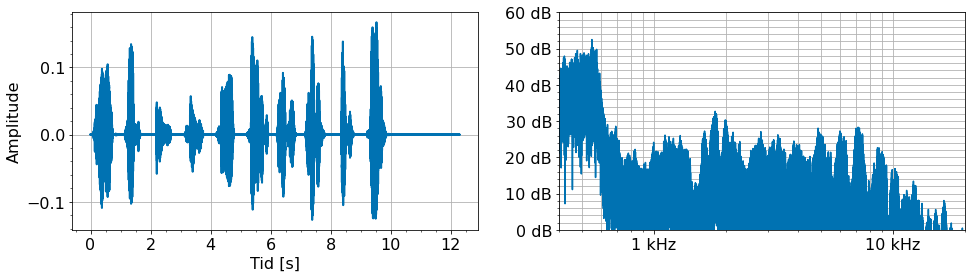

In [66]:
fig,ax = plt.subplots(1,2,  figsize=(16,4),facecolor="w")
ax[0].plot(t,y_l,lw=2,label="left steer")
ax[0].set_xlabel("Tid [s]")
ax[0].set_ylabel("Amplitude")
ax[0].grid()
ax[1].semilogx(freq, 20*np.log10(np.abs(y_fft_ref)),label="Ikke styret signal")
ax[1].set_xlim(400,20e3)
ax[1].set_ylim(0,60)
# ax[1].legend(loc=1)
ax[1].grid(which="both")
ax[1].xaxis.set_major_formatter(formatEng)
ax[1].yaxis.set_major_formatter(formatdB)

In [67]:
fig.savefig("non_steer_collage.eps")